In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage.color import rgb2gray
import numpy as np
from collections import Counter


[[[248 255 250]
  [248 255 250]
  [248 255 251]
  ...
  [255 255 251]
  [255 255 251]
  [254 255 250]]

 [[255 252 255]
  [255 251 255]
  [255 250 255]
  ...
  [255 249 254]
  [255 249 254]
  [255 249 254]]

 [[255 251 255]
  [255 251 255]
  [255 252 255]
  ...
  [248 255 255]
  [248 255 255]
  [248 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Text(0.5, 1.0, 'Original Image - E/18/025')

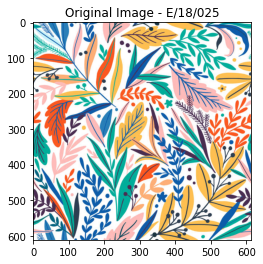

In [29]:
# Step 2: Read the original image into a Matrix.
# 25 < 150 -> selected Pattern.jpg
image = img.imread('Pattern.jpg')
print(image)
plt.figure(1)
imgplot = plt.imshow(image)
plt.title("Original Image - E/18/025")

In [3]:
image

array([[[248, 255, 250],
        [248, 255, 250],
        [248, 255, 251],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [254, 255, 250]],

       [[255, 252, 255],
        [255, 251, 255],
        [255, 250, 255],
        ...,
        [255, 249, 254],
        [255, 249, 254],
        [255, 249, 254]],

       [[255, 251, 255],
        [255, 251, 255],
        [255, 252, 255],
        ...,
        [248, 255, 255],
        [248, 255, 255],
        [248, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

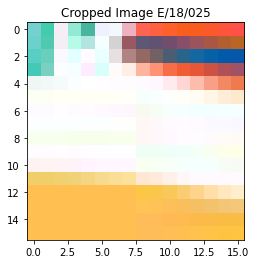

In [4]:
# Step 3: Select 16×16 cropped sub-image from your input at step2. 
xPosition = 0;  # x position = 0*60 = 0
yPosition = 100; # y position = 25*4 = 100
width = 16;
height = 16;
# Crop the image based on the provided coordinates
cropped_image = image[yPosition:yPosition+height, xPosition:xPosition+width]

# Display the cropped image
plt.figure(2)
plt.imshow(cropped_image)
plt.title("Cropped Image E/18/025")
plt.show()


In [5]:
np.size(cropped_image)

768

In [6]:
cropped_image.shape

(16, 16, 3)

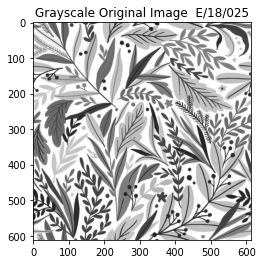

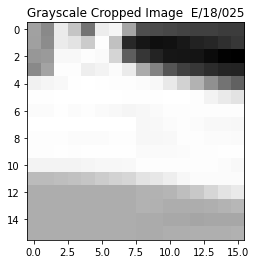

In [7]:
# Convert the original image to grayscale
gray_original = (rgb2gray(image) * 255).astype('uint8')

# Convert the cropped image to grayscale
gray_cropped = (rgb2gray(cropped_image) * 255).astype('uint8')

# Display the grayscale original image
plt.figure(3)
plt.imshow(gray_original, cmap='gray')
plt.title("Grayscale Original Image  E/18/025")

# Display the grayscale cropped image
plt.figure(4)
plt.imshow(gray_cropped, cmap='gray')
plt.title("Grayscale Cropped Image  E/18/025")
plt.show()

In [8]:
gray_original

array([[253, 253, 253, ..., 254, 254, 254],
       [252, 252, 251, ..., 250, 250, 250],
       [252, 252, 252, ..., 253, 253, 253],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
gray_cropped

array([[188, 171, 240, 213, 156, 241, 247, 191, 130, 128, 125, 122, 120,
        120, 118, 117],
       [187, 173, 240, 234, 217, 252, 210, 103,  91,  86,  87,  92,  99,
        102, 108, 114],
       [181, 183, 249, 249, 252, 250, 224, 141, 113, 100,  91,  90,  89,
         83,  77,  75],
       [171, 189, 252, 252, 242, 246, 251, 240, 194, 166, 135, 120, 114,
        107, 101, 100],
       [244, 247, 249, 253, 254, 253, 252, 252, 251, 249, 238, 222, 200,
        176, 156, 143],
       [253, 253, 254, 254, 254, 254, 254, 253, 253, 253, 254, 254, 252,
        246, 239, 235],
       [251, 251, 253, 251, 252, 250, 249, 247, 248, 250, 252, 252, 252,
        252, 252, 252],
       [254, 254, 254, 254, 254, 254, 254, 254, 248, 249, 251, 252, 251,
        249, 249, 248],
       [252, 252, 252, 251, 251, 251, 252, 252, 248, 248, 249, 252, 252,
        251, 251, 250],
       [252, 252, 253, 252, 253, 253, 253, 253, 250, 250, 250, 251, 252,
        252, 253, 253],
       [245, 246, 245, 246, 24

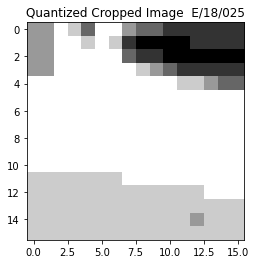

In [10]:
# Calculate the quantization levels
quant_levels = 8

# Calculate the quantization step size
quant_step = 256 / quant_levels

# Quantize the cropped image
quantized_image = np.floor(gray_cropped / quant_step) * quant_step

# Display the quantized image
plt.figure(6)
plt.imshow(quantized_image, cmap='gray')
plt.title("Quantized Cropped Image  E/18/025")
plt.show()


In [11]:
quantized_image

array([[160., 160., 224., 192., 128., 224., 224., 160., 128., 128.,  96.,
         96.,  96.,  96.,  96.,  96.],
       [160., 160., 224., 224., 192., 224., 192.,  96.,  64.,  64.,  64.,
         64.,  96.,  96.,  96.,  96.],
       [160., 160., 224., 224., 224., 224., 224., 128.,  96.,  96.,  64.,
         64.,  64.,  64.,  64.,  64.],
       [160., 160., 224., 224., 224., 224., 224., 224., 192., 160., 128.,
         96.,  96.,  96.,  96.,  96.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        192., 192., 160., 128., 128.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        224., 224., 224., 224., 224.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        224., 224., 224., 224., 224.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        224., 224., 224., 224., 224.],
       [224., 224., 224., 224., 224., 224., 224., 224., 224., 224., 224.,
        224., 224., 22

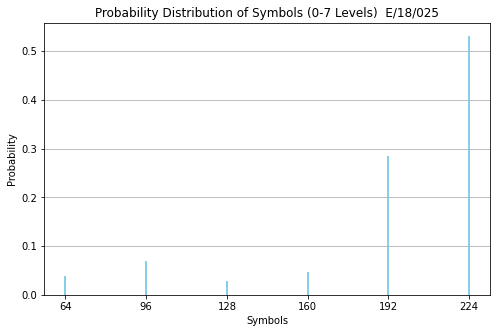

In [12]:
# Flatten the quantized image to obtain a 1D array
flatten_quantized = quantized_image.flatten()

# Calculate the frequency of each symbol (0-7 levels)
symbol_count = Counter(flatten_quantized)

# Calculate the probability distribution of each symbol
total_symbols = len(flatten_quantized)
symbol_probability = {symbol: count / total_symbols for symbol, count in symbol_count.items()}

# Sort the probabilities by symbol
sorted_probs = {k: symbol_probability[k] for k in sorted(symbol_probability)}

# Plotting the probability distribution
plt.figure(figsize=(8, 5))

symbols = sorted_probs.keys()
probs = sorted_probs.values()

plt.bar(symbols, probs, color='skyblue')
plt.title('Probability Distribution of Symbols (0-7 Levels)  E/18/025')
plt.xlabel('Symbols')
plt.ylabel('Probability')
plt.xticks(list(sorted_probs.keys()))  
plt.grid(axis='y')

plt.show()

In [13]:
# Sort symbols and probabilities in descending order of probability
sorted_symbol_probabilities = sorted(symbol_probability.items(), key=lambda x: x[1], reverse=True)

# Separate sorted symbols and probabilities into two lists
sorted_symbols = [symbol for symbol, _ in sorted_symbol_probabilities]
sorted_probabilities = [prob for _, prob in sorted_symbol_probabilities]

# Displaying sorted symbols and their probabilities
print("Sorted Symbols (Descending Order of Probability):", sorted_symbols)
print("Probabilities (Descending Order of Probability):", sorted_probabilities)

Sorted Symbols (Descending Order of Probability): [224.0, 192.0, 96.0, 160.0, 64.0, 128.0]
Probabilities (Descending Order of Probability): [0.53125, 0.28515625, 0.0703125, 0.046875, 0.0390625, 0.02734375]


In [30]:
# Step 6: Construct the Huffman coding algorithm for the cropped image at Step 4 (without using inbuilt algorithms)

def build_huffman_tree(symbols, freq):
    # Initialize list of trees as leaf nodes
    trees = [[freq[i], [symbols[i], '']] for i in range(len(symbols))]
    
    while len(trees) > 1:
        # Sort the trees by frequency
        trees = sorted(trees, key=lambda x: x[0])
        
        # Take the two trees with the lowest frequency
        left_tree = trees[0]
        right_tree = trees[1]
        
        # Add '0' to codewords of the left tree and '1' to codewords of the right tree
        for pair in left_tree[1:]:
            pair[1] = '1' + pair[1]
        for pair in right_tree[1:]:
            pair[1] = '0' + pair[1]
        
        # Create a parent node and add the frequency of children to it
        parent = [left_tree[0] + right_tree[0]] + left_tree[1:] + right_tree[1:]
        
        # Remove the children from the list and add the parent node
        trees = trees[2:]
        trees.append(parent)
    
    # Return the root node of the Huffman tree
    return trees[0]

# Build the Huffman tree for the symbols and their frequencies
huffman_tree = build_huffman_tree(sorted_symbols, sorted_probabilities)

# Invert the bits of each Huffman code to get the correct representation
inverted_codewords = {}
for symbol, code in huffman_tree[1:]:
    inverted_codewords[symbol] = ''.join('1' if bit == '0' else '0' for bit in code)

for symbol, code in inverted_codewords.items():
    print(f"Symbol: {symbol}, Code: {code}")


Symbol: 96.0, Code: 000
Symbol: 160.0, Code: 0010
Symbol: 128.0, Code: 00110
Symbol: 64.0, Code: 00111
Symbol: 192.0, Code: 01
Symbol: 224.0, Code: 1


In [15]:
# function to round to nearest codeword
def round_to_nearest_codeword(quantized_values, codewords):
    rounded_values = []
    for quantized_pixel in quantized_values:
        if quantized_pixel not in codewords:
            nearest_value = min(codewords.keys(), key=lambda x: abs(x - quantized_pixel))
            rounded_values.append(nearest_value)
        else:
            rounded_values.append(quantized_pixel)
    
    return rounded_values

#function to compress using code
def compress_image(image, codewords):
    # Flatten the image
    flattened_image = image.flatten()
    
    # Convert pixel values to their corresponding Huffman codes
    compressed_bits = ''.join(codewords[pixel] for pixel in flattened_image if pixel in codewords)
    
    return compressed_bits

# Quantize the grayscale original image 
quantized_original = np.floor(gray_original / quant_step) * quant_step

# Round to codebook values
quantized_rounded_original = round_to_nearest_codeword(quantized_original.flatten(), inverted_codewords)

# Convert the rounded values back to a NumPy array with the original shape
quantized_rounded_original = np.array(quantized_rounded_original).reshape(gray_original.shape)

# Compress the quantized cropped image using the Huffman codes
compressed_cropped_image = compress_image(quantized_image, inverted_codewords)

# Compress the original image using the Huffman codes
compressed_original_image = compress_image(quantized_rounded_original, inverted_codewords)


In [16]:
compressed_cropped_image

'0010001010100110110010001100011000000000000000000000100010110110100000111001110011100111000000000000001000101111100110000000001110011100111001110011100111001000101111110100100011000000000000000011111111111010100100011000110111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111010101010101011111111110101010101010101010101010111101010101010101010101010101010101010101010101010101010101001001010101010101010101010101010101010101'

In [17]:
quantized_rounded_original

array([[224., 224., 224., ..., 224., 224., 224.],
       [224., 224., 224., ..., 224., 224., 224.],
       [224., 224., 224., ..., 224., 224., 224.],
       ...,
       [224., 224., 224., ..., 224., 224., 224.],
       [224., 224., 224., ..., 224., 224., 224.],
       [224., 224., 224., ..., 224., 224., 224.]])

In [18]:
len(quantized_original)

612

In [19]:
len(compressed_cropped_image)

469

In [35]:
len(compressed_original_image)

963906

In [21]:
inverted_codewords

{96.0: '000',
 160.0: '0010',
 128.0: '00110',
 64.0: '00111',
 192.0: '01',
 224.0: '1'}

In [22]:
def save_to_text_file(data, filename):
    with open(filename, 'w') as file:
        file.write(data)

# Save the compressed cropped image to a text file
save_to_text_file(compressed_cropped_image, 'compressed_cropped_image.txt')

# Save the compressed original image to a text file
save_to_text_file(compressed_original_image, 'compressed_original_image.txt')


In [23]:
# Step 9: Compress the original image using Huffman encoding function in the Matlab tool box andsave it into another text file.

import huffman

# Convert the NumPy array to a list
image_data = quantized_rounded_original.flatten().tolist()

# Calculate symbol frequencies
symbol_freq = {}
for symbol in image_data:
    if symbol in symbol_freq:
        symbol_freq[symbol] += 1
    else:
        symbol_freq[symbol] = 1

# Generate Huffman codes (Get the Huffman tree)
huff_tree = huffman.codebook(list(symbol_freq.items()))

# Function to manually encode data
def encode_data(data, huffman_tree):
    codebook = dict(huffman_tree)
    encoded_data = ''.join(codebook[symbol] for symbol in data)
    return encoded_data

# Manually encode the image data using the Huffman tree
compressed_bits = encode_data(image_data, huff_tree)

# Save the compressed data 
with open('compressed_image_with_lib.txt', 'w') as file:
    file.write(compressed_bits)


In [36]:
len(compressed_bits)

883680

In [24]:
huff_tree, inverted_codewords

({224.0: '0',
  160.0: '1100',
  96.0: '1101',
  128.0: '100',
  192.0: '111',
  64.0: '101'},
 {96.0: '000',
  160.0: '0010',
  128.0: '00110',
  64.0: '00111',
  192.0: '01',
  224.0: '1'})

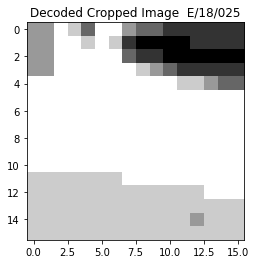

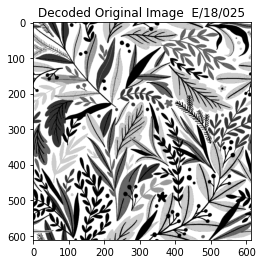

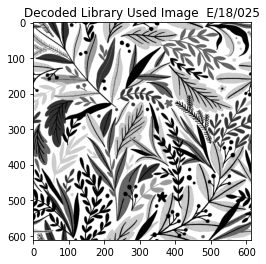

In [25]:
def huffman_decode_binary(encoded_data, codebook):
    decoded_data = []
    current_code = ''
    reverse_codebook = {code: symbol for symbol, code in codebook.items()}

    for bit in encoded_data:
        current_code += bit
        if current_code in reverse_codebook:
            decoded_data.append(int(reverse_codebook[current_code]))
            current_code = ''

    return decoded_data

# Read the compressed cropped image data from the text file
with open('compressed_cropped_image.txt', 'r') as file:
    compressed_cropped_data = file.read().strip()  # Read data and remove leading/trailing whitespace

# Read the compressed original image data from the text file
with open('compressed_original_image.txt', 'r') as file:
    compressed_original_data = file.read().strip()  # Read data and remove leading/trailing whitespace

# Read the library compressed original image data from the text file
with open('compressed_image_with_lib.txt', 'r') as file:
    compressed_lib_data = file.read().strip()  # Read data and remove leading/trailing whitespace

# Decode the compressed cropped image
decoded_cropped_data = huffman_decode_binary(compressed_cropped_data, inverted_codewords)
# Reshape the decoded cropped image to 16x16
decoded_cropped_image = np.array(decoded_cropped_data, dtype=np.uint8).reshape(16, 16)

# Decode the compressed original image
decoded_original_data = huffman_decode_binary(compressed_original_image, inverted_codewords)
# Reshape the decoded original image to 612x612
decoded_original_image = np.array(decoded_original_data, dtype=np.uint8).reshape(612, 612)

# Decode the library compressed original image
decode_lib_data = huffman_decode_binary(compressed_lib_data, huff_tree)
# Reshape the decoded original image to 612x612
decoded_lib_image = np.array(decode_lib_data, dtype=np.uint8).reshape(612, 612)


# Display the decoded cropped image
plt.imshow(decoded_cropped_image, cmap='gray')
plt.title('Decoded Cropped Image  E/18/025')
plt.show()

# Display the decoded original image
plt.imshow(decoded_original_image, cmap='gray')
plt.title('Decoded Original Image  E/18/025')
plt.show()

# Display the decoded original library used image
plt.imshow(decoded_lib_image, cmap='gray')
plt.title('Decoded Library Used Image  E/18/025')
plt.show()


In [26]:
gray_original.shape

(612, 612)

In [27]:
entropy = -np.sum(p * np.log2(p) for p in sorted_probabilities if p != 0)
print(f"Entropy of the cropped image: {entropy} bits/pixel")

Entropy of the cropped image: 1.8019488099758605 bits/pixel


C:\Users\apons\AppData\Local\Temp\ipykernel_17852\1966581971.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  entropy = -np.sum(p * np.log2(p) for p in sorted_probabilities if p != 0)


In [28]:
# Step 12: Evaluate the PSNR
def calculate_psnr(original_image, decompressed_image):
    mse = np.mean((original_image - decompressed_image) ** 2)
    max_pixel_value = 255
    psnr = 10 * np.log10((max_pixel_value ** 2) / (mse + 1e-6))
    return round(psnr, 3)

pnsr_original = calculate_psnr(gray_original, decoded_original_image)
pnsr_crop = calculate_psnr(gray_cropped, decoded_cropped_image)

print(f" pnsr of original image = {pnsr_original}dB")
print(f" pnsr of crop image     = {pnsr_crop}dB")


 pnsr of original image = 28.136dB
 pnsr of crop image     = 28.993dB


In [31]:
# Calculate symbol frequencies
symbol_freq = {}
total_symbols = len(quantized_rounded_original.flatten())

for symbol in quantized_rounded_original.flatten():
    if symbol in symbol_freq:
        symbol_freq[symbol] += 1
    else:
        symbol_freq[symbol] = 1

# Calculate probabilities from frequencies
probabilities = {symbol: freq / total_symbols for symbol, freq in symbol_freq.items()}

# Display the probability distribution table
print("Symbol\tProbability")
for symbol, prob in probabilities.items():
    print(f"{symbol}\t{prob:.4f}")


Symbol	Probability
224.0	0.3971
160.0	0.0622
96.0	0.0914
128.0	0.1048
192.0	0.1977
64.0	0.1468


In [34]:
import math

# Calculate entropy using probabilities
entropy = -sum(prob * math.log2(prob) for prob in sorted_probs.values() if prob != 0)

print(f"Entropy of the source: {entropy:.4f} bits/symbol")


Entropy of the source: 1.8019 bits/symbol


In [ ]:
# lengths is a dictionary containing symbol lengths
# probabilities is a dictionary containing symbol probabilities

average_length = sum(probabilities[symbol] * lengths[symbol] for symbol in probabilities)
print(f"Average code length: {average_length:.4f} bits/symbol")
